In [1]:
import pandas as pd
import os, re
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import os 
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

# sns.set_theme(style = "dark", 
#         color_codes = True,
#         font_scale = 1.5)

In [2]:
def load_image_csvs(path="image_csv"):
    train_folder=os.path.join(os.getcwd(),path,"train")
    test_folder=os.path.join(os.getcwd(),path,"test")
    
    X_train, X_test, Y_train, Y_test = [],[],[],[]
    
    # loading images from train folder to X_train and label to y_train
    train_count = 0
    for image_fname in os.listdir(train_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.csv',image_fname)
        
        # process preprocessed image into normalised flattened numpy array
        image = np.loadtxt(os.path.join(train_folder,image_fname),delimiter=',',dtype=np.float32)
        assert image.shape == (240,240)
        image = image.reshape(240*240)
        image = image.astype('float32')
        image /= 255
        image = np.asarray(image).astype('float32')
        
        label = image_re.group(2)
        
        X_train.append(image)
        Y_train.append(label)
        train_count+=1
        if train_count % 1000==0:
            print(train_count)
    print("Loaded train folder")
    
    # loading images from test folder to X_test and label to y_test
    test_count = 0
    for image_fname in os.listdir(test_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.csv',image_fname)
        
        # process preprocessed image into normalised flattened numpy array
        image = np.loadtxt(os.path.join(test_folder,image_fname),delimiter=',',dtype=np.float32)
        assert image.shape == (240,240)
        image = image.reshape(240*240)
        image = image.astype('float32')
        image /= 255
        image = np.asarray(image).astype('float32')
        
        label = image_re.group(2)
        
        X_test.append(image)
        Y_test.append(label)
        test_count+=1
        if test_count % 1000==0:
            print(test_count)
    print("Loaded test folder")
    
    return np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)

In [3]:
X_train, X_test, Y_train, Y_test = load_image_csvs()

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Loaded train folder
1000
Loaded test folder


In [4]:
print(X_train)
print(np.shape(X_train))

[[0.00784314 0.01176471 0.00784314 ... 0.00784314 0.00784314 0.00784314]
 [0.03137255 0.03137255 0.03137255 ... 0.02745098 0.02745098 0.02745098]
 [0.         0.         0.         ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00392157 ... 0.         0.         0.        ]]
(10618, 57600)


In [5]:
print(X_test)
print(np.shape(X_test))

[[0.01176471 0.01176471 0.01176471 ... 0.01568628 0.01568628 0.01568628]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00392157 ... 0.01568628 0.01568628 0.01176471]
 [0.         0.         0.         ... 0.01176471 0.01176471 0.01176471]]
(1405, 57600)


In [6]:
print(Y_train)
print(np.shape(Y_train))

['3' '2' '3' ... '1' '2' '0']
(10618,)


In [7]:
print(Y_test)
print(np.shape(Y_test))

['2' '0' '3' ... '0' '3' '3']
(1405,)


In [8]:
from keras.utils import to_categorical

print("Shape before one-hot encoding : ",Y_train.shape)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print("Shape after one-hot encoding : ",Y_train.shape)

2024-06-25 04:26:20.785744: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 04:26:20.785844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 04:26:20.939888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-25 04:26:21.300352: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shape before one-hot encoding :  (10618,)
Shape after one-hot encoding :  (10618, 4)


In [9]:
Y_train

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [10]:
Y_test

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [11]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout


L1=200
L2=100
L3=50
model = Sequential()
model.add(Dense(L1,input_dim=57600,activation='relu'))
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))
# output layer (softmax = multinomial)
model.add(Dense(4,activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [13]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_accuracy',patience=3)
history = model.fit(X_train,Y_train,epochs=15,batch_size=32,validation_data=(X_test,Y_test),callbacks=[callback])

Epoch 1/15
332/332 [==============================] - 18s 51ms/step - loss: 1.3029 - accuracy: 0.3965 - val_loss: 1.0332 - val_accuracy: 0.6085
Epoch 2/15
332/332 [==============================] - 16s 49ms/step - loss: 1.1738 - accuracy: 0.4709 - val_loss: 1.0674 - val_accuracy: 0.5601
Epoch 3/15
332/332 [==============================] - 16s 49ms/step - loss: 1.1074 - accuracy: 0.5049 - val_loss: 0.8457 - val_accuracy: 0.6690
Epoch 4/15
332/332 [==============================] - 16s 49ms/step - loss: 1.0487 - accuracy: 0.5420 - val_loss: 0.8934 - val_accuracy: 0.6320
Epoch 5/15
332/332 [==============================] - 17s 50ms/step - loss: 0.9724 - accuracy: 0.5764 - val_loss: 0.8353 - val_accuracy: 0.6612
Epoch 6/15
332/332 [==============================] - 17s 50ms/step - loss: 0.9463 - accuracy: 0.5862 - val_loss: 0.8273 - val_accuracy: 0.6569


In [14]:
def plot_history(history):
    import matplotlib.pyplot as plt
 
    acc2 = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss2 = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1,len(acc2)+1)

    # Creating subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

    axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
    axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    axes[1].plot(epochs, loss2,'b',label='Train Loss')
    axes[1].plot(epochs, val_loss,'r',label='Test Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Display the figure
    plt.show()

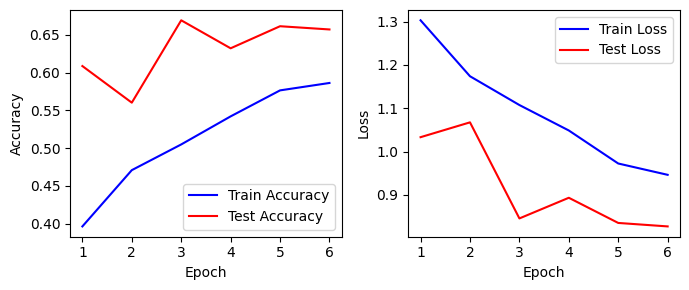

In [15]:
plot_history(history)

In [16]:
import numpy as np
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred,axis=1)
Y_test_arg = np.argmax(Y_test,axis=1)
Y_pred

44/44 [==============================] - 0s 7ms/step


array([2, 0, 1, ..., 0, 3, 3])

In [17]:
num_classes = 4
from sklearn.metrics import classification_report
target_dicts = {0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}
target_names = target_dicts.values()
print(classification_report(Y_test_arg,Y_pred,target_names=target_names))

              precision    recall  f1-score   support

      glioma       0.45      0.89      0.60       309
  meningioma       0.68      0.41      0.51       335
     notumor       0.84      0.88      0.86       399
   pituitary       0.88      0.43      0.58       362

    accuracy                           0.66      1405
   macro avg       0.72      0.66      0.64      1405
weighted avg       0.73      0.66      0.65      1405



In [18]:
# tuning

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        hp.Int("L1_units", min_value=200, max_value=400+1, step=50),
        input_dim=57600,
        activation='relu'
    ))
    model.add(
        Dense(
            # Define the hyperparameter.
            units=hp.Int("L2_units", min_value=150, max_value=300+1, step=25),
            activation='relu'
        )
    )
    model.add(
        Dense(
            # Define the hyperparameter.
            units=hp.Int("L3_units", min_value=100, max_value=200+1, step=25),
            activation='relu'
        )
    )
    model.add(Dense(4,activation='softmax'))
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=["accuracy"],
    )
    return model

In [19]:
import keras_tuner

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
    directory="dnn_tune",
    project_name="tune_dnn",
)

In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
L1_units (Int)
{'default': None, 'conditions': [], 'min_value': 200, 'max_value': 401, 'step': 50, 'sampling': 'linear'}
L2_units (Int)
{'default': None, 'conditions': [], 'min_value': 150, 'max_value': 301, 'step': 25, 'sampling': 'linear'}
L3_units (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 201, 'step': 25, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [21]:
callback = EarlyStopping(monitor='val_accuracy',patience=3)
tuner.search(X_train, Y_train, epochs=15,batch_size=32, validation_data=(X_test, Y_test), callbacks=[callback])

Trial 20 Complete [00h 03m 15s]
val_accuracy: 0.2708185017108917

Best val_accuracy So Far: 0.817081868648529
Total elapsed time: 01h 57m 19s


In [22]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               17280300  
                                                                 
 dense_1 (Dense)             (None, 225)               67725     
                                                                 
 dense_2 (Dense)             (None, 200)               45200     
                                                                 
 dense_3 (Dense)             (None, 4)                 804       
                                                                 
Total params: 17394029 (66.35 MB)
Trainable params: 17394029 (66.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
tuner.results_summary()

Results summary
Results in dnn_tune/tune_dnn
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 11 summary
Hyperparameters:
L1_units: 300
L2_units: 225
L3_units: 200
learning_rate: 0.00030815756150995
Score: 0.817081868648529

Trial 14 summary
Hyperparameters:
L1_units: 200
L2_units: 175
L3_units: 125
learning_rate: 0.00029765041890868964
Score: 0.8149466216564178

Trial 17 summary
Hyperparameters:
L1_units: 200
L2_units: 275
L3_units: 125
learning_rate: 0.0005421534453265072
Score: 0.8124555051326752

Trial 06 summary
Hyperparameters:
L1_units: 400
L2_units: 150
L3_units: 125
learning_rate: 0.00034901756064868733
Score: 0.8032028377056122

Trial 02 summary
Hyperparameters:
L1_units: 250
L2_units: 150
L3_units: 125
learning_rate: 0.00013870534917984574
Score: 0.7850534021854401

Trial 00 summary
Hyperparameters:
L1_units: 200
L2_units: 275
L3_units: 150
learning_rate: 0.0004980947137951163
Score: 0.7754448354244232

Trial 05 summary
Hyperparameters:
L1_units:

In [24]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
best_model = build_model(best_hps[0])
# Fit with the entire dataset.
callback = EarlyStopping(monitor='val_accuracy',patience=3)
tuned_history = best_model.fit(X_train,Y_train,epochs=15,batch_size=32,validation_data=(X_test,Y_test),callbacks=[callback])

Epoch 1/15
332/332 [==============================] - 24s 72ms/step - loss: 0.1736 - accuracy: 0.3882 - val_loss: 0.1502 - val_accuracy: 0.6028
Epoch 2/15
332/332 [==============================] - 24s 72ms/step - loss: 0.1567 - accuracy: 0.4752 - val_loss: 0.1361 - val_accuracy: 0.5658
Epoch 3/15
332/332 [==============================] - 23s 70ms/step - loss: 0.1479 - accuracy: 0.5115 - val_loss: 0.1185 - val_accuracy: 0.6826
Epoch 4/15
332/332 [==============================] - 24s 71ms/step - loss: 0.1382 - accuracy: 0.5596 - val_loss: 0.1007 - val_accuracy: 0.7203
Epoch 5/15
332/332 [==============================] - 23s 71ms/step - loss: 0.1341 - accuracy: 0.5672 - val_loss: 0.0998 - val_accuracy: 0.7189
Epoch 6/15
332/332 [==============================] - 23s 70ms/step - loss: 0.1254 - accuracy: 0.6028 - val_loss: 0.0916 - val_accuracy: 0.7423
Epoch 7/15
332/332 [==============================] - 24s 72ms/step - loss: 0.1209 - accuracy: 0.6193 - val_loss: 0.0846 - val_accuracy:

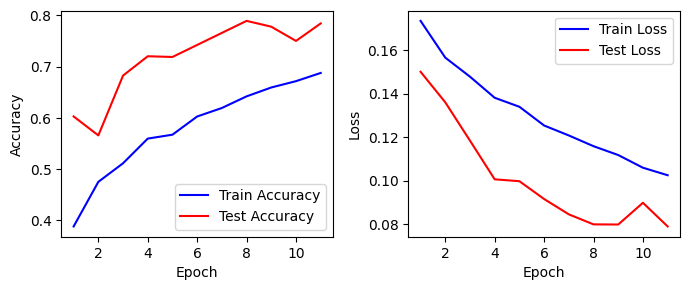

In [25]:
plot_history(tuned_history)

In [26]:
import numpy as np
Y_pred = best_model.predict(X_test)
Y_pred = np.argmax(Y_pred,axis=1)
Y_test_arg = np.argmax(Y_test,axis=1)
Y_pred

44/44 [==============================] - 0s 9ms/step


array([2, 0, 3, ..., 0, 3, 3])

In [27]:
num_classes = 4
from sklearn.metrics import classification_report
target_dicts = {0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}
target_names = target_dicts.values()
print(classification_report(Y_test_arg,Y_pred,target_names=target_names))

              precision    recall  f1-score   support

      glioma       0.77      0.75      0.76       309
  meningioma       0.71      0.67      0.69       335
     notumor       0.77      0.94      0.85       399
   pituitary       0.90      0.75      0.82       362

    accuracy                           0.78      1405
   macro avg       0.79      0.78      0.78      1405
weighted avg       0.79      0.78      0.78      1405

